In [ ]:
# Exploratory Analysis

# Convert File to Feather

In [ ]:
# load in final-filtered-mut-netphos dataset for familiarization
import pandas as pd
import os 
import time

# set paths to relative paths
csv_path = '../data/filtered/mut/final-filtered-mut-netphos.csv'
feather_path = '../data/filtered/mut/final-filtered-mut-netphos.feather'

# compare reading times for csv and feather files
start_csv = time.time()
df_csv = pd.read_csv(csv_path)
end_csv = time.time() - start_csv

# convert to feather
df_csv.to_feather(feather_path)

# get file sizes
csv_size = os.path.getsize(csv_path) / 1024
feather_size = os.path.getsize(feather_path) / 1024

# time loading speed for feather file
start_feather = time.time()
df_feather = pd.read_feather(feather_path)
end_feather = time.time() - start_feather

# compare file sizes and run times: 
print(f'CSV file size: {csv_size:.2f} kb')
print(f'Feather file size: {feather_size:.2f} kb')
print(f'CSV read time: {end_csv:.4f} seconds')
print(f'Feather read time: {end_feather:.4f} seconds')



CSV file size: 1529.84 kb
Feather file size: 1300.66 kb
CSV read time: 0.0330 seconds
Feather read time: 0.0190 seconds



# Explore Final Filtered Mut Netphos DS

# Check Dataset for Shape and Length

In [26]:

print(f'Length: {len(df_feather)}')
print('')
print(f'Array Shape: {df_feather}')

Length: 43424

Array Shape:         Gene wt  pos mut    context  score  kinase answer
0      ABCB1  S   35   N  KPTVSNFSM  0.470  CaM-II      .
1      ABCB1  S   35   N  KPTVSNFSM  0.469     PKA      .
2      ABCB1  S   35   N  KPTVSNFSM  0.440    GSK3      .
3      ABCB1  S   35   N  KPTVSNFSM  0.413     PKG      .
4      ABCB1  S   35   N  KPTVSNFSM  0.365     CKI      .
...      ... ..  ...  ..        ...    ...     ...    ...
43419  ZFP36  Y  157   Y  CHKFYYQGR  0.023    unsp      .
43420  ZFP36  Y  164   Y  GRCPYYSRC  0.441    INSR      .
43421  ZFP36  Y  164   Y  GRCPYYSRC  0.361     SRC      .
43422  ZFP36  Y  164   Y  GRCPYYSRC  0.336    EGFR      .
43423  ZFP36  Y  164   Y  GRCPYYSRC  0.024    unsp      .

[43424 rows x 8 columns]


# Check for Missing Data and Frequencies of Categorical Variables

In [31]:
print(f'Amount of missing entries: {df_feather.isnull().sum()}')
print(F' Amount of unique entries per column: {df_feather.nunique(dropna=False)}')

Amount of missing entries: Gene       0
wt         0
pos        0
mut        0
context    0
score      0
kinase     0
answer     0
dtype: int64
 Amount of unique entries per column: Gene         53
wt           13
pos        1503
mut          21
context    3264
score       978
kinase       18
answer        2
dtype: int64


# Bar Chart for Frequency

<Axes: xlabel='wt', ylabel='count'>

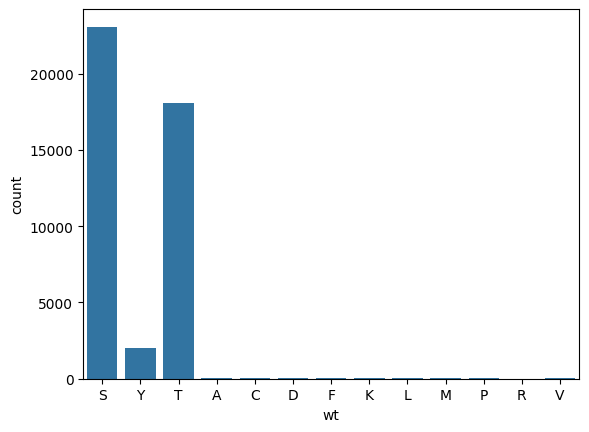

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_feather, x='wt')

+ High frequency of S & T
+ Distant third in Y
+ All other have trace amounts


<Axes: xlabel='mut', ylabel='count'>

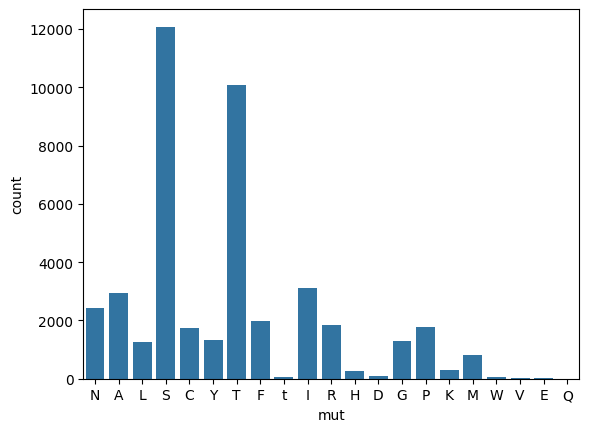

In [35]:
sns.countplot(data=df_feather, x='mut')


+ S & T have highest freq.
  + Follows same behavior as wt graph
+ t, D, K, W, V, E, Q nearly no representation

<Axes: xlabel='kinase', ylabel='count'>

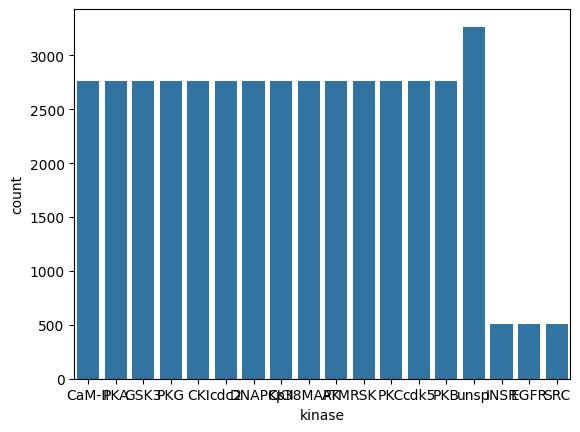

In [36]:
sns.countplot(data=df_feather, x='kinase')

+ Fairly equal distribution of kinase
  + Three pairs at the end severely undersampled/under represented


# Understand Sampling Relationship for Classes

In [45]:
answer_counts = df_feather['answer'].value_counts()
print(f'Number of Class 0 instances: {answer_counts.get(0)}')
print(f'Number of Class 1 instances: {answer_counts.get(1)}')


Number of Class 0 instances: 40544
Number of Class 1 instances: 2880


C:\Users\Eftoon\AppData\Local\Temp\ipykernel_4316\4162446994.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Number of Class 0 instances: {answer_counts.get(0)}')
C:\Users\Eftoon\AppData\Local\Temp\ipykernel_4316\4162446994.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Number of Class 1 instances: {answer_counts.get(1)}')


+ Fairly uneven class distribution
  + May look into SMOTE if preliminary model underperforms

# Boxplots for finding "Answer"

## Score by Answer Class

<function matplotlib.pyplot.show(close=None, block=None)>

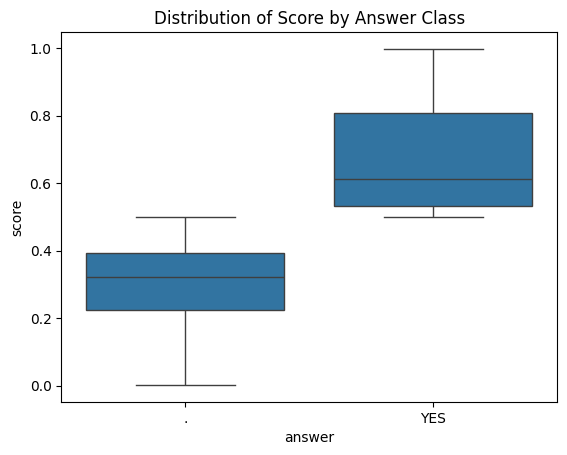

In [48]:
sns.boxplot(data=df_feather, x='answer', y='score')
plt.title('Distribution of Score by Answer Class')
plt.show

## Position by Answer Class

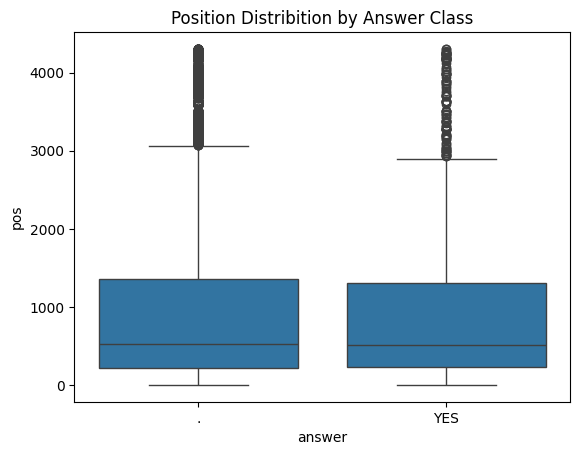

In [ ]:
sns.boxplot(data=df_feather, x='answer', y='pos')
plt.title('Distribition of Position by Answer Class')
plt.show()

## Now Substitute Answer with Kinase

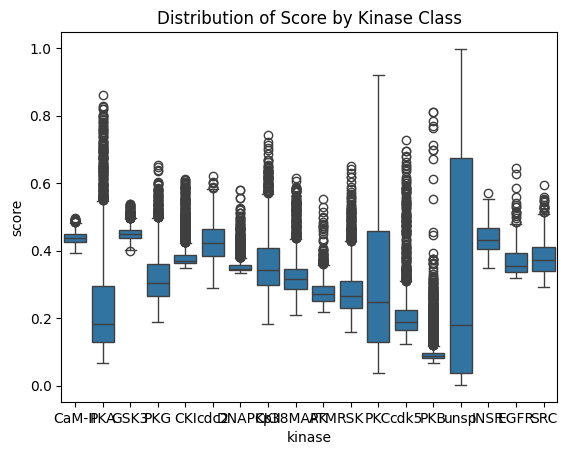

In [50]:
sns.boxplot(data=df_feather, x='kinase', y='score')
plt.title('Distribution of Score by Kinase Class')
plt.show()

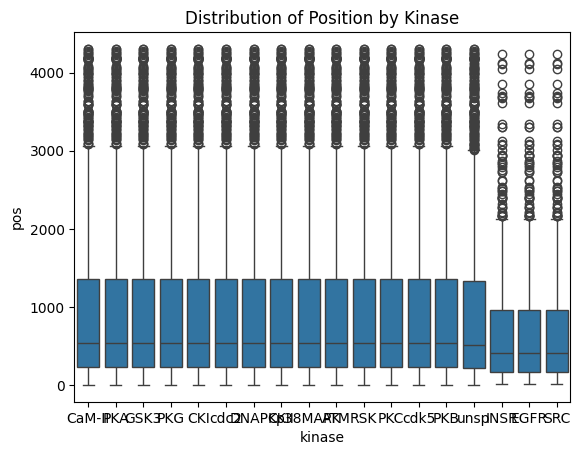

In [52]:
sns.boxplot(data=df_feather, x='kinase', y='pos')
plt.title('Distribution of Position by Kinase')
plt.show()

## Immediate Takeaways:
+ Variable relationship between:
    + Score and Answer Class
    + Score and Kinase
+ Non-variable relationships:
    + Position and Answer Class
    + Position and Kinase
+ Position may not be an important factor in predicting score
    + Boxplot shows a nearly identical distribution for class 0 &  1